# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "mondo-ncit-renal-subset"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000001,disease or disorder,skos:exactMatch,NCIT:C154631,Condition Domain,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,condition,lexmatch
1,MONDO:0000001,disease or disorder,skos:exactMatch,NCIT:C156809,Medical Condition,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,medical condition,lexmatch
2,MONDO:0000001,disease or disorder,skos:exactMatch,NCIT:C156809,Medical Condition,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,medical condition,lexmatch
3,MONDO:0000001,disease or disorder,skos:exactMatch,NCIT:C173902,CTRP Clinical Finding,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,other disease,lexmatch
4,MONDO:0000001,disease or disorder,skos:exactMatch,NCIT:C25457,Condition,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,condition,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
192090,MONDO:8000017,testicular regression syndrome,skos:exactMatch,NCIT:C38683,Traumeel S,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,trs,lexmatch
192091,MONDO:8000023,type 3 autoimmune lymphoproliferative syndrome,skos:exactMatch,NCIT:C39577,Type 3 Autoimmune Lymphoproliferative Syndrome,semapv:LexicalMatching,oaklib,0.5,rdf:ID,oio:hasDbXref-INVERSE,mondo:8000023,lexmatch
192095,MONDO:8000023,type 3 autoimmune lymphoproliferative syndrome,skos:exactMatch,NCIT:C39577,Type 3 Autoimmune Lymphoproliferative Syndrome,semapv:LexicalMatching,oaklib,0.5,rdf:ID,skos:exactMatch-INVERSE,mondo:8000023,lexmatch
192099,MONDO:8000023,type 3 autoimmune lymphoproliferative syndrome,skos:exactMatch,NCIT:C39577,Type 3 Autoimmune Lymphoproliferative Syndrome,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasExactSynonym,type 3 autoimmune lymphoproliferative syndrome,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label   
subject_match_field   object_match_field                                     
oio:hasBroadSynonym   oio:hasExactSynonym              1032           1032  \
                      rdfs:label                        224            224   
oio:hasDbXref         oio:hasDbXref-INVERSE               2              2   
                      rdf:ID                            160            160   
oio:hasExactSynonym   oio:hasExactSynonym             24568          24568   
                      rdfs:label                       5625           5625   
oio:hasNarrowSynonym  oio:hasExactSynonym               332            332   
                      rdfs:label                        100            100   
oio:hasRelatedSynonym oio:hasExactSynonym              4278           4278   
                      rdfs:label                        830            830   
rdf:ID                oio:hasDbXref-INVERSE            7023           7023   
                      skos:broadMatch-INVERSE             1              1   
                      skos:exactMatch-INVERSE          6872           6872   
                      skos:relatedMatch-INVERSE          32             32   
rdfs:label            oio:hasExactSynonym              6611           6611   
                      rdfs:label                       4718           4718   
skos:exactMatch       rdf:ID                            159            159   

                                                 predicate_id  object_id   
subject_match_field   object_match_field                                   
oio:hasBroadSynonym   oio:hasExactSynonym                1032       1032  \
                      rdfs:label                          224        224   
oio:hasDbXref         oio:hasDbXref-INVERSE                 2          2   
                      rdf:ID                              160        160   
oio:hasExactSynonym   oio:hasExactSynonym               24568      24568   
                      rdfs:label                         5625       5625   
oio:hasNarrowSynonym  oio:hasExactSynonym                 332        332   
                      rdfs:label                          100        100   
oio:hasRelatedSynonym oio:hasExactSynonym                4278       4278   
                      rdfs:label                          830        830   
rdf:ID                oio:hasDbXref-INVERSE              7023       7023   
                      skos:broadMatch-INVERSE               1          1   
                      skos:exactMatch-INVERSE            6872       6872   
                      skos:relatedMatch-INVERSE            32         32   
rdfs:label            oio:hasExactSynonym                6611       6611   
                      rdfs:label                         4718       4718   
skos:exactMatch       rdf:ID                              159        159   

                                                 object_label   
subject_match_field   object_match_field                        
oio:hasBroadSynonym   oio:hasExactSynonym                1032  \
                      rdfs:label                          224   
oio:hasDbXref         oio:hasDbXref-INVERSE                 2   
                      rdf:ID                              160   
oio:hasExactSynonym   oio:hasExactSynonym               24568   
                      rdfs:label                         5625   
oio:hasNarrowSynonym  oio:hasExactSynonym                 332   
                      rdfs:label                          100   
oio:hasRelatedSynonym oio:hasExactSynonym                4278   
                      rdfs:label                          830   
rdf:ID                oio:hasDbXref-INVERSE              7023   
                      skos:broadMatch-INVERSE               1   
                      skos:exactMatch-INVERSE            6872   
                      skos:relatedMatch-INVERSE            32   
rdfs:label            oio:hasExactSynonym                6611   
                

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0002350,familial nephrotic syndrome,skos:exactMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0002350,curated
6,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003008,curated
11,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,NCIT:C8496,Hereditary Kidney Wilms Tumor,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003321,curated
15,MONDO:0003789,hereditary papillary renal cell carcinoma,skos:exactMatch,NCIT:C9222,Hereditary Papillary Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003789,curated
21,MONDO:0003824,hereditary kidney oncocytoma,skos:exactMatch,NCIT:C8960,Hereditary Kidney Oncocytoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003824,curated
24,MONDO:0004691,autosomal dominant polycystic kidney disease,skos:exactMatch,NCIT:C84578,Autosomal Dominant Polycystic Kidney Disease,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0004691,curated
35,MONDO:0005342,IgA glomerulonephritis,skos:exactMatch,NCIT:C34643,IgA Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0005342,curated
44,MONDO:0005798,HIV-associated nephropathy,skos:exactMatch,NCIT:C26918,HIV-Associated Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0005798,curated
48,MONDO:0007416,Balkan nephropathy,skos:exactMatch,NCIT:C123025,Aristolochic Acid Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0007416,curated
59,MONDO:0007888,hereditary leiomyomatosis and renal cell cancer,skos:exactMatch,NCIT:C51302,Hereditary Leiomyomatosis and Renal Cell Carci...,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0007888,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:broadMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial juvenile gouty nephropathy,gpt3
1,MONDO:0000909,Bartter disease type 4B,skos:narrowMatch,MONDO:0011242,Bartter disease type 4A,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasRelatedSynonym,oio:hasRelatedSynonym,"bartter syndrome, infantile, with sensorineura...",gpt3
2,MONDO:0002350,familial nephrotic syndrome,skos:broadMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,congenital nephrotic syndrome,gpt3
3,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003008,gpt3
4,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,NCIT:C8496,Hereditary Kidney Wilms Tumor,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,hereditary kidney adenosarcoma,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:narrowMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt3
113,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt3
114,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:exactMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt3
115,NCIT:C80078,Chronic Kidney Disease,skos:narrowMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:narrowMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial juvenile gouty nephropathy,gpt4
1,MONDO:0000909,Bartter disease type 4B,skos:relatedMatch,MONDO:0011242,Bartter disease type 4A,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasRelatedSynonym,oio:hasRelatedSynonym,"bartter syndrome, infantile, with sensorineura...",gpt4
2,MONDO:0002350,familial nephrotic syndrome,skos:relatedMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,congenital nephrotic syndrome,gpt4
3,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003008,gpt4
4,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,NCIT:C8496,Hereditary Kidney Wilms Tumor,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,hereditary kidney adenosarcoma,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt4
113,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt4
114,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt4
115,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id   
mapping_source predicate_id                                              
gpt3           owl:differentFrom           8              8          8  \
               skos:broadMatch            18             18         18   
               skos:exactMatch            28             28         28   
               skos:narrowMatch           54             54         54   
               skos:relatedMatch           9              9          9   
gpt4           owl:differentFrom           4              4          4   
               skos:exactMatch            33             33         33   
               skos:narrowMatch           31             31         31   
               skos:relatedMatch          49             49         49   

                                  object_label  mapping_justification   
mapping_source predicate_id                                             
gpt3           owl:differentFrom             8                      8  \
               skos:broadMatch              18                     18   
               skos:exactMatch              28                     28   
               skos:narrowMatch             54                     54   
               skos:relatedMatch             9                      9   
gpt4           owl:differentFrom             4                      4   
               skos:exactMatch              33                     33   
               skos:narrowMatch             31                     31   
               skos:relatedMatch            49                     49   

                                  subject_source  object_source  mapping_tool   
mapping_source predicate_id                                                     
gpt3           owl:differentFrom               8              8             8  \
               skos:broadMatch                18             18            18   
               skos:exactMatch                28             28            28   
               skos:narrowMatch               54             54            54   
               skos:relatedMatch               9              9             9   
gpt4           owl:differentFrom               4              4             4   
               skos:exactMatch                33             33            33   
               skos:narrowMatch               31             31            31   
               skos:relatedMatch              49             49            49   

                                  confidence  subject_match_field   
mapping_source predicate_id                                         
gpt3           owl:differentFrom           8                    8  \
               skos:broadMatch            18                   18   
               skos:exactMatch            28                   28   
               skos:narrowMatch           54                   54   
               skos:relatedMatch           9                    9   
gpt4           owl:differentFrom           4                    4   
               skos:exactMatch            33                   33   
               skos:narrowMatch           31                   31   
               skos:relatedMatch          49                   49   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                   8             8  
               skos:broadMatch                    18            18  
               skos:exactMatch                    28            28  
               skos:narrowMatch                   54            54  
               skos:relatedMatch                   9             9  
gpt4           owl:differentFrom                   4             4  
               skos:exactMatch                    33            33  
               skos:narrowMatch                   31            31  
               skos:relatedMatch                  49            49

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,MONDO:0014099,NCIT:C123071,0.69,skos:exactMatch,"nephrotic syndrome, type 8",Nephrotic Syndrome - ARHGDIA Associated,logmap
1,MONDO:0008679,NCIT:C27730,0.64,skos:exactMatch,Wilms tumor 1,Childhood Kidney Wilms Tumor,logmap
2,MONDO:0014005,NCIT:C34644,0.63,skos:exactMatch,immunoglobulin-mediated membranoproliferative ...,Membranoproliferative Glomerulonephritis,logmap
3,MONDO:0014005,NCIT:C123055,0.55,skos:exactMatch,immunoglobulin-mediated membranoproliferative ...,Immune Complex Mediated Membranoproliferative ...,logmap
4,MONDO:0013131,NCIT:C123166,1.01,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
5,MONDO:0005798,NCIT:C26918,0.82,skos:exactMatch,HIV-associated nephropathy,HIV-Associated Nephropathy,logmap
6,MONDO:0009733,NCIT:C121198,0.82,skos:exactMatch,"nephrotic syndrome, type 4",Congenital Nephrotic Syndrome - Diffuse Mesang...,logmap
7,MONDO:0019005,NCIT:C123200,1.17,skos:exactMatch,nephronophthisis,Nephronophthisis,logmap
8,MONDO:0013619,NCIT:C123099,0.68,skos:exactMatch,"nephrotic syndrome, type 6",Nephrotic Syndrome - PTPRO Associated,logmap
9,MONDO:0020642,NCIT:C75464,1.02,skos:exactMatch,polycystic kidney disease,Polycystic Kidney Disease,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
4,MONDO:0013131,NCIT:C123166,1.01,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
5,MONDO:0005798,NCIT:C26918,0.82,skos:exactMatch,HIV-associated nephropathy,HIV-Associated Nephropathy,logmap
6,MONDO:0009733,NCIT:C121198,0.82,skos:exactMatch,"nephrotic syndrome, type 4",Congenital Nephrotic Syndrome - Diffuse Mesang...,logmap
7,MONDO:0019005,NCIT:C123200,1.17,skos:exactMatch,nephronophthisis,Nephronophthisis,logmap
9,MONDO:0020642,NCIT:C75464,1.02,skos:exactMatch,polycystic kidney disease,Polycystic Kidney Disease,logmap
16,MONDO:0009732,NCIT:C122795,0.81,skos:exactMatch,"congenital nephrotic syndrome, Finnish type",Nephrotic Syndrome - NPHS1 Associated,logmap
17,MONDO:0003008,NCIT:C39789,0.90,skos:exactMatch,hereditary renal cell carcinoma,Hereditary Renal Cell Carcinoma,logmap
22,MONDO:0018492,NCIT:C36260,0.87,skos:exactMatch,hereditary clear cell renal cell carcinoma,Hereditary Clear Cell Renal Cell Carcinoma,logmap
23,MONDO:0005342,NCIT:C35280,0.90,skos:exactMatch,IgA glomerulonephritis,Focal Glomerulonephritis,logmap
28,MONDO:0024633,NCIT:C4757,0.91,skos:exactMatch,hypertensive nephropathy,Hypertensive Nephropathy,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.6792452830188679, 0.6428571428571429, 0.72)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.69, 0.68),
 (0.71, 0.6666666666666666),
 (0.66, 0.6551724137931034),
 (0.7, 0.6530612244897959),
 (0.63, 0.6451612903225806)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
4,MONDO:0013131,NCIT:C123166,1.01,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
5,MONDO:0005798,NCIT:C26918,0.82,skos:exactMatch,HIV-associated nephropathy,HIV-Associated Nephropathy,logmap
6,MONDO:0009733,NCIT:C121198,0.82,skos:exactMatch,"nephrotic syndrome, type 4",Congenital Nephrotic Syndrome - Diffuse Mesang...,logmap
7,MONDO:0019005,NCIT:C123200,1.17,skos:exactMatch,nephronophthisis,Nephronophthisis,logmap
9,MONDO:0020642,NCIT:C75464,1.02,skos:exactMatch,polycystic kidney disease,Polycystic Kidney Disease,logmap
11,MONDO:0033004,NCIT:C84579,0.71,skos:exactMatch,polycystic kidney disease 4,Autosomal Recessive Polycystic Kidney Disease,logmap
16,MONDO:0009732,NCIT:C122795,0.81,skos:exactMatch,"congenital nephrotic syndrome, Finnish type",Nephrotic Syndrome - NPHS1 Associated,logmap
17,MONDO:0003008,NCIT:C39789,0.90,skos:exactMatch,hereditary renal cell carcinoma,Hereditary Renal Cell Carcinoma,logmap
22,MONDO:0018492,NCIT:C36260,0.87,skos:exactMatch,hereditary clear cell renal cell carcinoma,Hereditary Clear Cell Renal Cell Carcinoma,logmap
23,MONDO:0005342,NCIT:C35280,0.90,skos:exactMatch,IgA glomerulonephritis,Focal Glomerulonephritis,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.003,0.002,1.000
1,logmap,0.680,0.680,0.680
2,gpt3,0.679,0.643,0.720
3,gpt4,0.759,0.667,0.880


In [18]:
import matplotlib.pyplot as plt

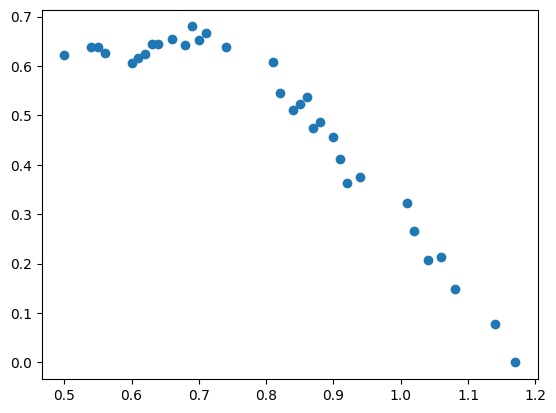

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

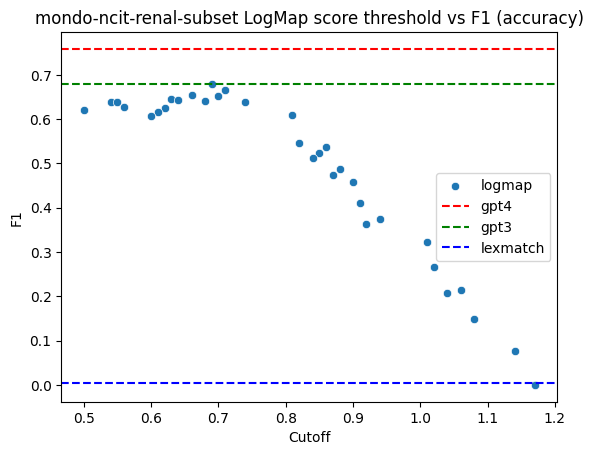

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('MONDO:0002350',
  'familial nephrotic syndrome',
  'NCIT:C35337',
  'Congenital Nephrotic Syndrome'),
 ('MONDO:0005363',
  'focal segmental glomerulosclerosis',
  'NCIT:C123139',
  'Focal Segmental Glomerulosclerosis, Not Otherwise Specified'),
 ('MONDO:0005363',
  'focal segmental glomerulosclerosis',
  'NCIT:C37308',
  'Focal Segmental Glomerulosclerosis'),
 ('MONDO:0008263',
  'polycystic kidney disease 1',
  'NCIT:C123167',
  'Autosomal Dominant Polycystic Kidney Disease Type I'),
 ('MONDO:0008264',
  'autosomal dominant medullary cystic kidney disease with or without hyperuricemia',
  'NCIT:C123171',
  'Medullary Cystic Kidney Disease Type I'),
 ('MONDO:0019006',
  'familial idiopathic steroid-resistant nephrotic syndrome',
  'NCIT:C122796',
  'Idiopathic Nephrotic Syndrome'),
 ('MONDO:0033004',
  'polycystic kidney disease 4',
  'NCIT:C84579',
  'Autosomal Recessive Polycystic Kidney Disease')}